In [1]:
!pip install nltk

In [2]:
!pip install vaderSentiment

<h1>Feature Engineering

<h5>En el dataset user_reviews se incluyen reseñas de juegos hechos por distintos usuarios. <h5>

   <h5>ACTIVIDAD N°1 :Debes crear la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos de machine learning y el análisis de datos. De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.<h5>

<h3>Lectura de archivos comprimidos en json.gzip<h3>

In [3]:
#!pip install nltk
#!pip install vaderSentiment
import ast
import gzip
import pandas as pd
import json
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

print("""Bibliotecas importadas : ast / gzip / pandas / json /nltk & vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
-------------------------------------------------------------------------------------------------------------------------------""")

print("""creando funcion para abrir archivo tipo Gz (.gzip), la función se llama 'abrir_comprimido'
-------------------------------------------------------------------------------------------------------------------------------""")
def abrir_comprimido_ast(archivo):
    data_list = []
    with gzip.open(archivo, 'rb') as file:
        for line in file:
            decode_line = line.decode('utf-8')
            data_list.append(ast.literal_eval(decode_line.strip()))
        return data_list
    
print("""Función creada con éxito!
-------------------------------------------------------------------------------------------------------------------------------""")

print("""Creando dataframe a través de la función llamada 'abrir_comprimido', Nombre del dataframe a crear:
'df_reviews' 
-------------------------------------------------------------------------------------------------------------------------------""")

archivo = r'user_reviews.json.gz'
data = abrir_comprimido_ast(archivo)
df_reviews = pd.DataFrame(data)

print("""Dataframe 'df_reviews' creado con éxito
-------------------------------------------------------------------------------------------------------------------------------""")

print("""Creando dataframe a través de la función llamada 'abrir_comprimido', Nombre del dataframe a crear:
'df_items' 
-------------------------------------------------------------------------------------------------------------------------------""")

archivo = r'users_items.json.gz'
data = abrir_comprimido_ast(archivo)
df_items = pd.DataFrame(data)

print("""Dataframe 'df_items' creado con éxito 
-------------------------------------------------------------------------------------------------------------------------------""")


print("""creando funcion para abrir archivo tipo Gz (.gzip), la función se llama:
'abrir_comprimido'
-------------------------------------------------------------------------------------------------------------------------------""")

def abrir_comprimido(archivo):
    data_list = []
    with gzip.open(archivo, 'rb') as file:
        for line in file:
            decode_line = line.decode('utf-8')
            data_list.append(json.loads(decode_line.strip()))
        return data_list

print("""Creando dataframe a través de la función llamada 'abrir_comprimido', Nombre del dataframe a crear:
'df_games' 
-------------------------------------------------------------------------------------------------------------------------------""")

archivo = r'steam_games.json.gz'
data = abrir_comprimido(archivo)
df_games = pd.DataFrame(data)

print("""Dataframe 'df_items' creado con éxito 
-------------------------------------------------------------------------------------------------------------------------------""")



print("""                                                                                
      .@@@@@@@@@@@@    @@@@*          @@@@#        @@@@@@         @@@@@@@@@@@.  
      @@@@@           (@@@@          *@@@@       %@@@@@@@.      @@@@#      .@   
      @@@@            @@@@*          @@@@%      @@@@.,@@@@      @@@@@#          
     @@@@@@@@@@@@    /@@@@          .@@@@     ,@@@@   @@@@       &@@@@@@@@@%    
     @@@@            @@@@*          @@@@%    @@@@@@@@@@@@@%            .@@@@#   
    &@@@@           (@@@@          .@@@@   .@@@@@@@@@@@@@@@   *@@.     @@@@@    
    @@@@@@@@@@@@    @@@@@@@@@@@@.  @@@@%  &@@@@        @@@@(  @@@@@@@@@@@@    
""")

print("""Código ejecutado con éxito
(^o^) Hurra!!
      """)

Bibliotecas importadas : ast / gzip / pandas / json /nltk & vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
-------------------------------------------------------------------------------------------------------------------------------
creando funcion para abrir archivo tipo Gz (.gzip), la función se llama 'abrir_comprimido'
-------------------------------------------------------------------------------------------------------------------------------
Función creada con éxito!
-------------------------------------------------------------------------------------------------------------------------------
Creando dataframe a través de la función llamada 'abrir_comprimido', Nombre del dataframe a crear:
'df_reviews' 
-------------------------------------------------------------------------------------------------------------------------------
Dataframe 'df_reviews' creado con éxito
----------------------------------------------------------------------------------------------

<h2>Normalizacion de datos Reviews

In [4]:
# Expandir la columna 'reviews' a filas separadas
df_reviews_expanded = df_reviews.explode('reviews')
# Normalizar la columna 'reviews' que ahora contiene diccionarios
normalized_reviews = pd.json_normalize(df_reviews_expanded['reviews'])
df_reviews_expanded = df_reviews_expanded.reset_index(drop=True)
df_reviews_normalized = pd.concat([df_reviews_expanded[['user_id', 'user_url']], normalized_reviews], axis=1)
df_reviews_normalized['review'] = df_reviews_normalized['review'].replace({'\n': '', '\r': '', '/': ''}, regex=True)
# Transformar 'item_id' a tipo de dato entero
df_reviews_normalized = df_reviews_normalized[df_reviews_normalized["item_id"].notna()]
df_reviews_normalized["item_id"] = df_reviews_normalized["item_id"].astype('int')
# Convertir 'recommend' a tipo booleano manteniendo los valores nan
df_reviews_normalized['recommend'] = df_reviews_normalized['recommend'].astype('boolean')
df_reviews_normalized.to_csv("df_reviews.csv", encoding = "utf-16")
df_reviews_final = df_reviews_normalized
df_reviews_normalized.info()


<class 'pandas.core.frame.DataFrame'>
Index: 59305 entries, 0 to 59332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      59305 non-null  object 
 1   user_url     59305 non-null  object 
 2   funny        59305 non-null  object 
 3   posted       59305 non-null  object 
 4   last_edited  59305 non-null  object 
 5   item_id      59305 non-null  int64  
 6   helpful      59305 non-null  object 
 7   recommend    59305 non-null  boolean
 8   review       59305 non-null  object 
dtypes: boolean(1), int64(1), object(7)
memory usage: 4.2+ MB


<h2>Analisis de Sentimiento

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import pandas as pd

# Descargar el léxico necesario para SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Crear una instancia de SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Función para realizar análisis de sentimiento considerando 'review'
def analyze_sentiment(row):
    if pd.isnull(row['review']):
        return 1  # Valor 1 si la reseña está ausente
    else:
        # Calcular el puntaje de sentimiento basado en la reseña
        review_sentiment = sia.polarity_scores(row['review'])['compound']
        
        # Asigna valores según el puntaje de sentimiento de la reseña
        if review_sentiment < 0:
            return 0  # Valor 0 si es negativo
        elif review_sentiment == 0:
            return 1  # Valor 1 si es neutral
        else:
            return 2  # Valor 2 si es positivo

# Aplicar la función a las filas y crear la nueva columna 'sentiment_analysis'
df_reviews_normalized['sentiment_analysis'] = df_reviews_normalized.apply(analyze_sentiment, axis=1)

# Eliminar la columna original 'review' si se desea
# df_reviews_normalized.drop('review', axis=1, inplace=True)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
analisis_de_sentimiento = df_reviews_normalized
analisis_de_sentimiento.head()

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2


<h2>Normalizacion de datos en df_items

In [7]:
# Expandir la columna 'reviews' a filas separadas
df_items_expandido = df_items.explode('items')
# Normalizar la columna 'reviews' que ahora contiene diccionarios
normalized_items = pd.json_normalize(df_items_expandido['items'])
df_items_expandido = df_items_expandido.reset_index(drop=True) #se reinicia el indice para mejor visual (al menos a mi gusto)
df_items_final = pd.concat([df_items_expandido[['user_id', 'items_count','steam_id','user_url']], normalized_items], axis=1) #se concatenan las columnas para entender mejor los datos

In [8]:
df_items_final.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0.0,0.0


<h2>Normalizacion de datos en df_games

In [9]:
df_games_na = df_games[df_games['id'].notna()]
df_games_na = df_games_na.explode('genres')
df_games_na_sub = df_games_na[["release_date","developer","id"]]
# Convertir la columna 'release_date' al tipo de datos de fecha y hora
df_games_na_sub['release_date'] = pd.to_datetime(df_games_na_sub['release_date'], errors='coerce')

# Filtrar las filas con valores no nulos en la columna 'release_date'
df_games_na_confecha = df_games_na_sub[df_games_na_sub['release_date'].notna()]
df_games_na_confecha['release_date'] = df_games_na_confecha['release_date'].dt.strftime('%Y-%m-%d')
# Eliminar duplicados de las columnas 'release_date', 'developer' e 'id'
df_games_fin = df_games_na_confecha.drop_duplicates(subset=['release_date', 'developer', 'id'])
# Reindexar el DataFrame a partir de 0
df_games_fin = df_games_fin.reset_index(drop=True)



/tmp/ipykernel_26758/987682317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_na_sub['release_date'] = pd.to_datetime(df_games_na_sub['release_date'], errors='coerce')
/tmp/ipykernel_26758/987682317.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_na_confecha['release_date'] = df_games_na_confecha['release_date'].dt.strftime('%Y-%m-%d')


<h1>EDA : (Exploratory Data Analysis-EDA)

In [14]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


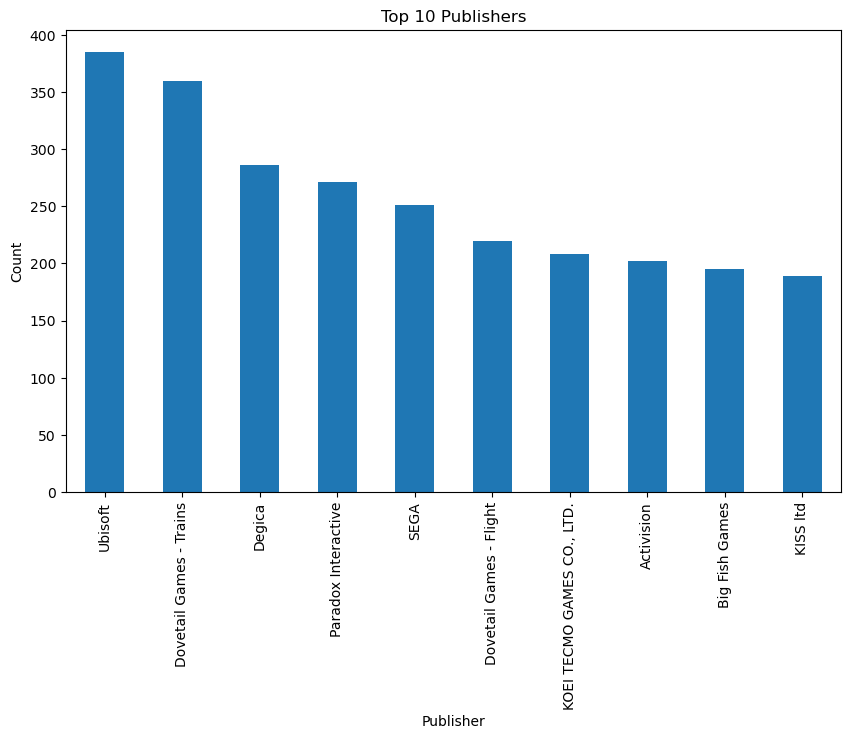

In [28]:
# Visualización de la distribución de la variable 'publisher'
plt.figure(figsize=(10, 6))
df_games['publisher'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.show()


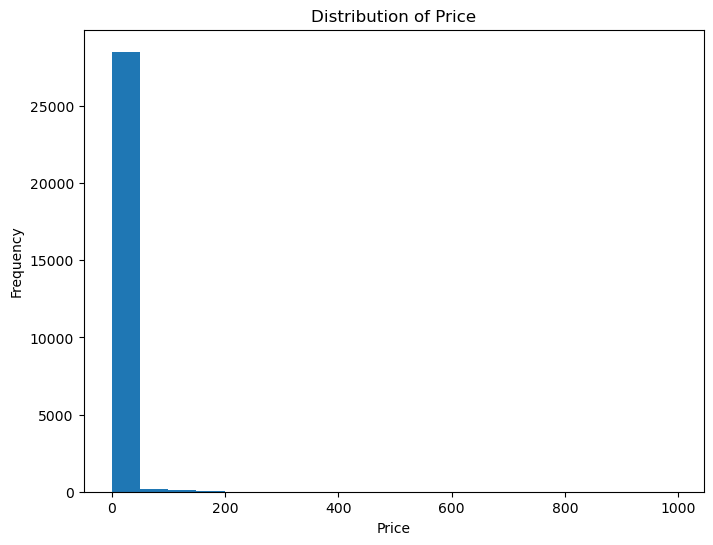

In [22]:
# Visualización de la distribución de la variable 'price'

df_games['price'] = pd.to_numeric(df_games['price'], errors='coerce')
plt.figure(figsize=(8, 6))
df_games['price'].dropna().plot(kind='hist', bins=20)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

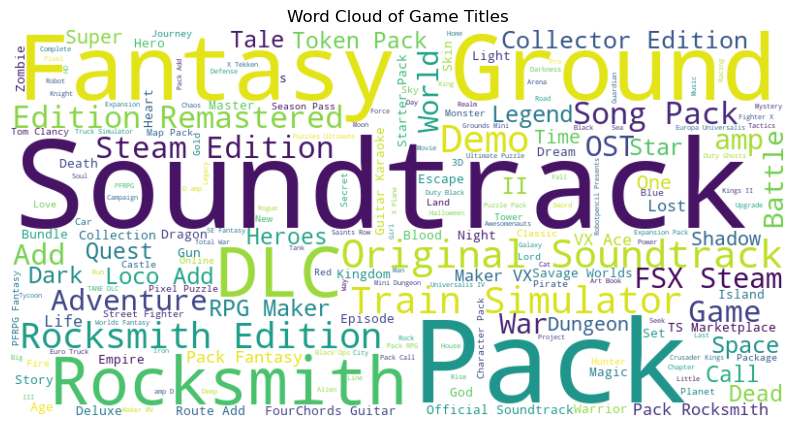

In [29]:
# Creación de una nube de palabras a partir de los títulos de los juegos

text = ' '.join(df_games['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Game Titles')
plt.show()

In [30]:
df_games.describe()

,price
count,28848.000000
mean,9.453921
std,16.251641
min,0.490000
25%,2.990000
50%,4.990000
75%,9.990000
max,995.000000


<Figure size 1200x800 with 0 Axes>

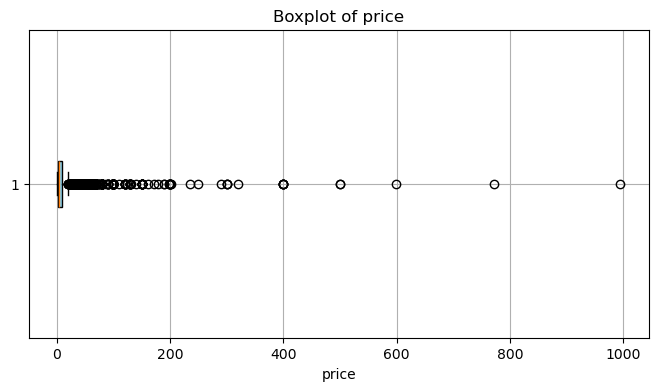

In [36]:
#valores atipicos en los precios del df
plt.figure(figsize=(12, 8))
for column in numeric_columns.columns:
    q1 = df_games[column].quantile(0.25)
    q3 = df_games[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Si hay valores atípicos, graficar el boxplot
    if df_games[(df_games[column] < lower_bound) | (df_games[column] > upper_bound)].any().any():
        plt.figure(figsize=(8, 4))
        plt.boxplot(df_games[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.grid(True)
        plt.show()


In [38]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


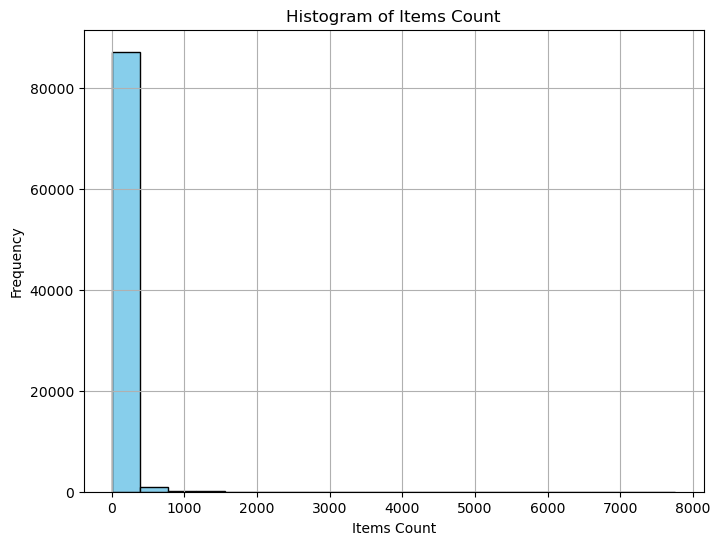

In [39]:
# Histograma de la variable 'items_count'
plt.figure(figsize=(8, 6))
plt.hist(df_items['items_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Items Count')
plt.xlabel('Items Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

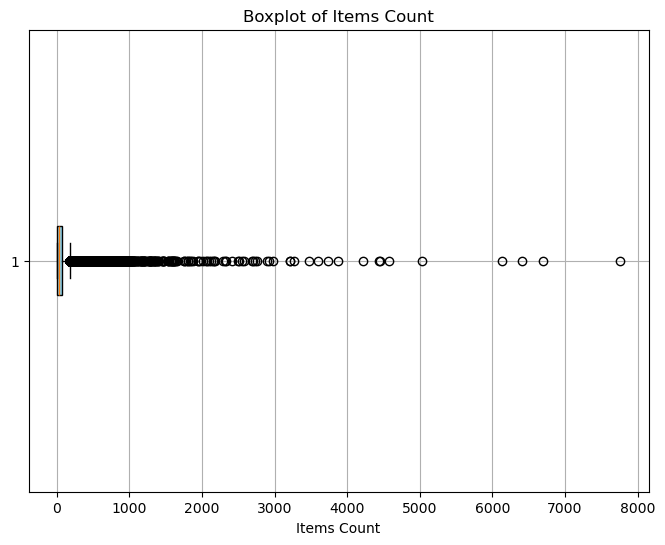

In [40]:
# Diagrama de caja y bigotes para la variable 'items_count'
plt.figure(figsize=(8, 6))
plt.boxplot(df_items['items_count'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Items Count')
plt.xlabel('Items Count')
plt.grid(True)
plt.show()

In [43]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


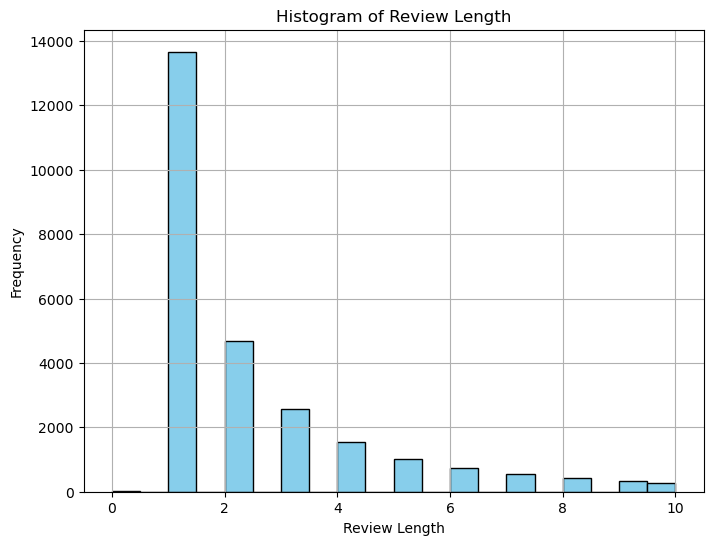

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(df_reviews['review_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()